In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import h5py
import glob 
from scipy import interpolate
import json
import os
import sys
from NuRadioReco.utilities import units
from NuRadioReco.detector import detector
from NuRadioMC.utilities import fluxes
from NuRadioMC.utilities.Veff import get_Veff_Aeff, get_Veff_Aeff_array, get_index, get_Veff_water_equivalent
#from my_Veff import get_Veff_Aeff, get_Veff_Aeff_array, get_index, get_Veff_water_equivalent
from NuRadioMC.examples.Sensitivities import E2_fluxes3 as limits
from Get_hdf5_data import get_attr_data, get_shower_data, get_station_data, get_Veff_data, get_event_data, get_nur_data
from Peak_Finding import count_peak, get_noise, save_data_2_csv, read_column_csv
import numpy as np
import matplotlib.pyplot as plt
from NuRadioReco.utilities import units
import NuRadioReco.detector.detector as detector
import NuRadioReco.modules.io.eventReader
import astropy
from NuRadioReco.framework.parameters import stationParameters as stnp
import pandas as pd
from math import isclose
import mplhep as hep

temp_stdout = None
# Disable
def blockPrint():
    global temp_stdout
    temp_stdout = sys.stdout
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    global temp_stdout
    sys.stdout = temp_stdout


PATH = "/home/teikiet/Data/"
##########################################################################
S_ID = [100,2, 3, 4, 5] #station ID
C_ID = list(range(0,16)) #channel ID
##########################################################################
threshold = 5 #threshold
bin_size = 11 #bin size aka time interval x0.625 ns
sample_size = 800 #the time interval for peak detection x0.625ns
E = 18 #energy
num =  1e4 #number of particles
detectordescription = "detector/ara2.json" #detector 
##########################################################################
#Nur path:
inputfilename1 = PATH + f"sims_monopoles_ara2_n1.000e04_3_18to20/Nur/1.000e{E}_3"
inputfilename2 = PATH + f"sims_neutrinos_ara2_n1.000e03_4_18to21/Nur/sim_1.000e{E}.nur"
inputfilename3 = PATH + f"sims_noise_ara2_n1.000e04_1_18to18/Nur/sim_1.000e18_part02.nur"
##########################################################################
#Hdf5 path:
path1 = PATH + f'sims_monopoles_ara2_n1.000e04_3_18to20/Hdf5/1.000e{E}'
path2 = PATH + f'sims_neutrinos_ara2_n1.000e03_4_18to21/Hdf5/sim_1.000e{E}.hdf5'
path3 = PATH + f'sims_noise_ara2_n1.000e04_1_18to18/Hdf5/'
#get_attr_data(path2)
##########################################################################
#Save data to csv file:
data1 = PATH + f'Peak_data/Data_monopoles_ara2_n1.000e04_1e{E}.csv'
data2 = PATH + f'Peak_data/Data_neutrinos_ara2_n1.000e03_1e{E}.csv'
data3 = PATH + f'Peak_data/Data_noise_ara2.csv'
##########################################################################
#Find peak and save data:
#save_data_2_csv(data1, inputfilename1, detectordescription, S_ID, C_ID)  
#save_data_2_csv(data2 ,inputfilename2, detectordescription, S_ID, C_ID)  
#save_data_2_csv(data3 ,inputfilename3, detectordescription, S_ID, C_ID)

In [2]:
V_peak1, T_peak1, PEAK1, NOISE1, d_T_peak1 = count_peak(data1, S_ID, C_ID, bin_size, threshold, sample_size)
V_peak2, T_peak2, PEAK2, NOISE2, d_T_peak2 = count_peak(data2, S_ID, C_ID, bin_size, threshold, sample_size)

Event ID: 1.0
Event ID: 2.0
Event ID: 3.0
Event ID: 4.0
Event ID: 5.0
Event ID: 6.0
Event ID: 7.0
Event ID: 8.0
Event ID: 9.0
Event ID: 10.0
Event ID: 11.0
Event ID: 12.0
Event ID: 13.0
Event ID: 14.0
Event ID: 15.0
Event ID: 16.0
Event ID: 17.0
Event ID: 18.0
Event ID: 19.0
Event ID: 20.0
Event ID: 21.0
Event ID: 22.0
Event ID: 23.0
Event ID: 24.0
Event ID: 25.0
Event ID: 26.0
Event ID: 27.0
Event ID: 28.0
Event ID: 29.0
Event ID: 30.0
Event ID: 31.0
Event ID: 32.0
Event ID: 33.0
Event ID: 34.0
Event ID: 35.0
Event ID: 36.0
Event ID: 37.0
Event ID: 38.0
Event ID: 39.0
Event ID: 40.0
Event ID: 41.0
Event ID: 42.0
Event ID: 43.0
Event ID: 44.0
Event ID: 45.0
Event ID: 46.0
Event ID: 47.0
Event ID: 48.0
Event ID: 49.0
Event ID: 50.0
Event ID: 51.0
Event ID: 52.0
Event ID: 53.0
Event ID: 54.0
Event ID: 55.0
Event ID: 56.0
Event ID: 57.0
Event ID: 58.0
Event ID: 59.0
Event ID: 60.0
Event ID: 61.0
Event ID: 62.0
Event ID: 63.0
Event ID: 64.0
Event ID: 65.0
Event ID: 66.0
Event ID: 67.0
Fini

In [3]:
d_T_peak2

array([23.75 , 20.625, 85.   , 82.5  ])

Text(0.5, 1.0, '')

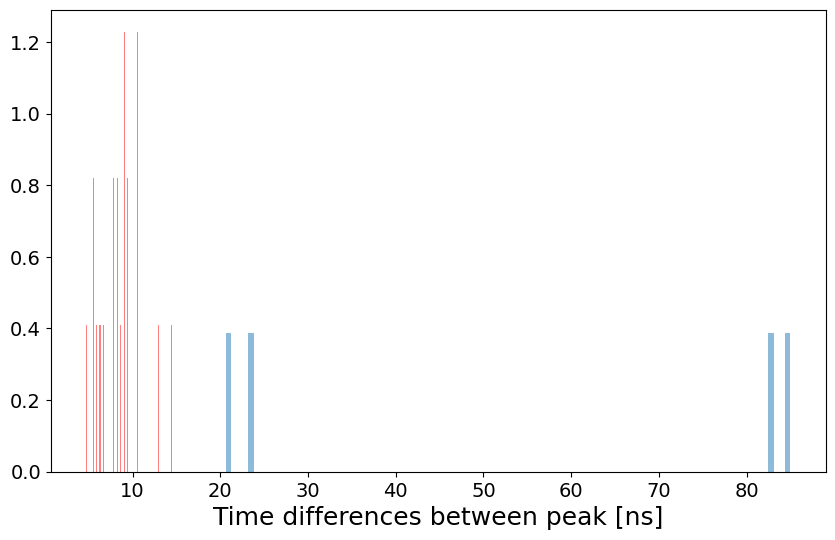

In [3]:
plt.figure(figsize=(10, 6))
T1 = d_T_peak1[np.where( abs(d_T_peak1) < 800)] * 0.625#np.diff(T_peak1)* 0.625
T1 = T1[np.where( T1 > 0)]
plt.hist(T1, bins=100, label='Monopoles', alpha=0.5, density=True, color='red')
plt.xlabel('Time differences between peak [ns]')
#plt.loglog()

#plt.figure(figsize=(10, 6))
T2 = d_T_peak2[np.where( abs(d_T_peak2) < 800)] #np.diff(T_peak2) * 0.625
T2 = T2[np.where( T2 > 0)]
plt.hist(T2, bins=100, label='Neutrinos', alpha=0.5, density=True)
plt.xlabel('Time differences between peak [ns]')
plt.title("")
#plt.loglog()
#plt.xlim(0, 200)


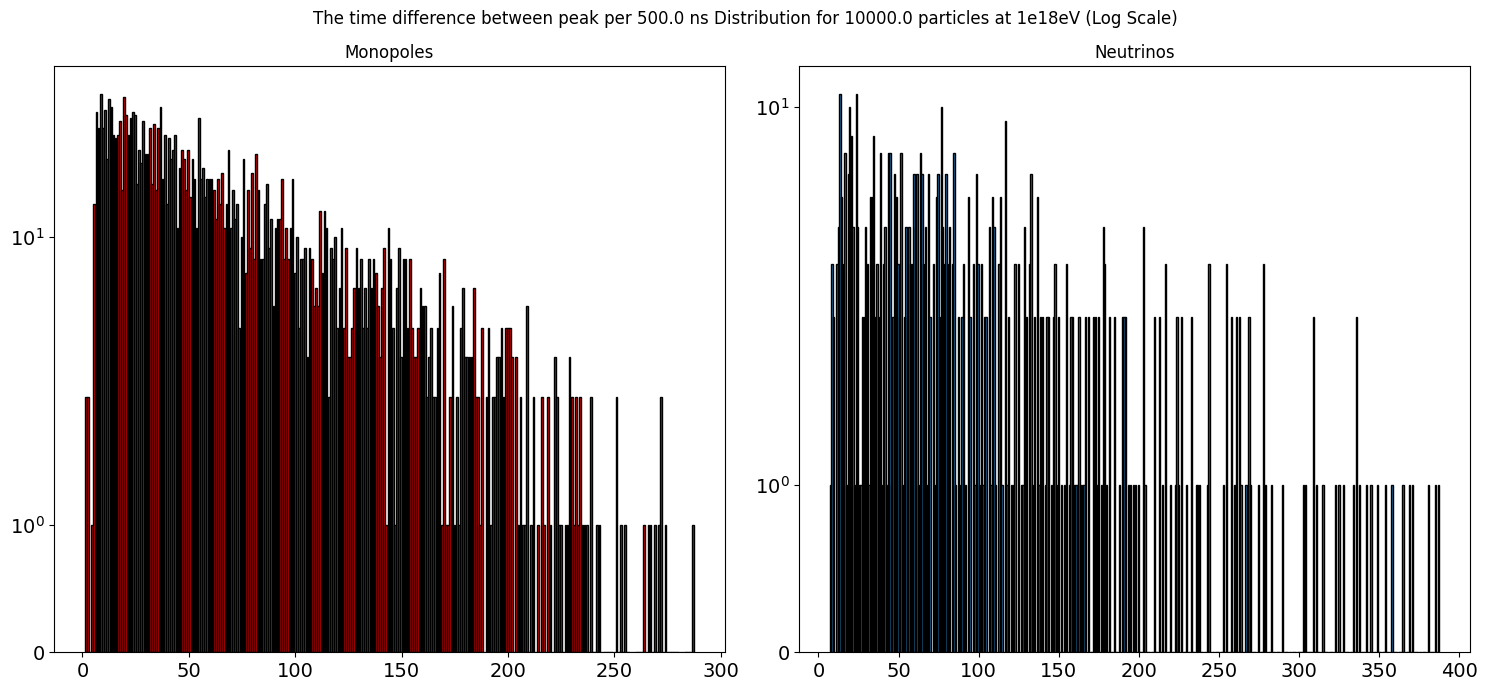

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Data for histograms
data1 = T1
data2 = T2

# Determine the common bin edges
bin_min = min(np.min(data1), np.min(data2))
bin_max = max(np.max(data1), np.max(data2))
num_bins = 20
bin_edges = np.linspace(bin_min, bin_max, num_bins + 1)

# Create a figure and set up subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first histogram with log scale on y-axis
#axs[0].hist(data1, alpha=0.7, color='blue', edgecolor='black')
h1 = axs[0].hist(data1, bins=int(max(data1)-min(data1))+1, range=(min(data1)-0.5, max(data1)+0.5), rwidth=0.8, edgecolor='black', color='red')

#axs[0].errorbar(h1[1][:-1]+0.5, h1[0], yerr=np.sqrt(h1[0]), fmt='none', color='black', capsize=10)
axs[0].set_title('Monopoles')
axs[0].set_yscale('symlog')

# Plot the second histogram with log scale on y-axis
#axs[1].hist(data2, alpha=0.7, color='red', edgecolor='black')
h2 = axs[1].hist(data2, bins=int(max(data2)-min(data2))+1, range=(min(data2)-0.5, max(data2)+0.5), rwidth=0.8, edgecolor='black')    
#axs[1].errorbar(h2[1][:-1]+0.5, h2[0], yerr=np.sqrt(h2[0]), fmt='none', color='black', capsize=10)
axs[1].set_title('Neutrinos')
axs[1].set_yscale('symlog')
# Set the y-axis limit to be the same for both subplots
max_value = max(np.max(np.histogram(data1, bins=bin_edges)[0]), np.max(np.histogram(data2, bins=bin_edges)[0]))
#for ax in axs:
    #ax.set_ylim([0, max_value*1.2])

# Add labels and title to the figure
fig.suptitle(f'The time difference between peak per {sample_size*0.625} ns Distribution for {num} particles at 1e{E}eV (Log Scale)')
plt.tight_layout()

# Show the plot
plt.show()


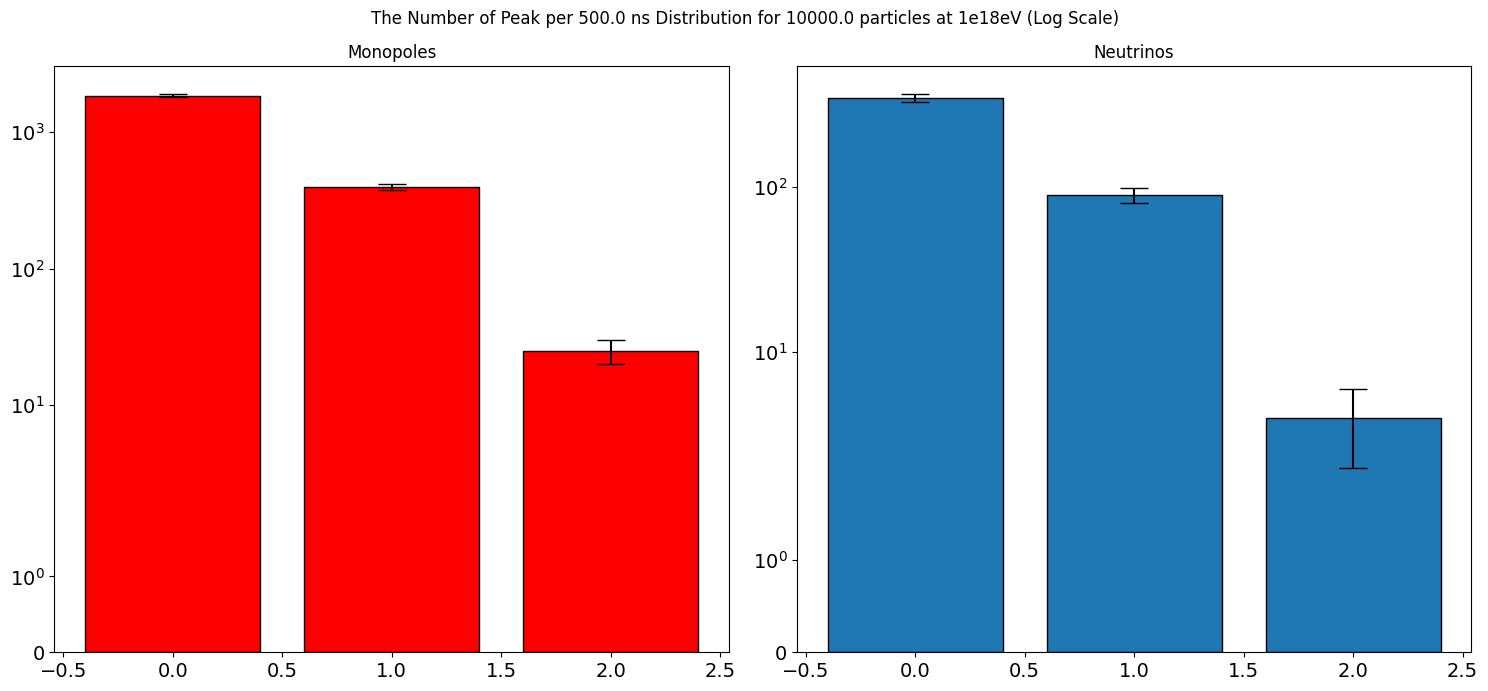

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data for histograms
data1 = PEAK1
data2 = PEAK2

# Determine the common bin edges
bin_min = min(np.min(data1), np.min(data2))
bin_max = max(np.max(data1), np.max(data2))
num_bins = 20
bin_edges = np.linspace(bin_min, bin_max, num_bins + 1)

# Create a figure and set up subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot the first histogram with log scale on y-axis
#axs[0].hist(data1, alpha=0.7, color='blue', edgecolor='black')
h1 = axs[0].hist(data1, bins=int(max(data1)-min(data1))+1, range=(min(data1)-0.5, max(data1)+0.5), rwidth=0.8, edgecolor='black', color='red')

axs[0].errorbar(h1[1][:-1]+0.5, h1[0], yerr=np.sqrt(h1[0]), fmt='none', color='black', capsize=10)
axs[0].set_title('Monopoles')
axs[0].set_yscale('symlog')

# Plot the second histogram with log scale on y-axis
#axs[1].hist(data2, alpha=0.7, color='red', edgecolor='black')
h2 = axs[1].hist(data2, bins=int(max(data2)-min(data2))+1, range=(min(data2)-0.5, max(data2)+0.5), rwidth=0.8, edgecolor='black')    
axs[1].errorbar(h2[1][:-1]+0.5, h2[0], yerr=np.sqrt(h2[0]), fmt='none', color='black', capsize=10)
axs[1].set_title('Neutrinos')
axs[1].set_yscale('symlog')
# Set the y-axis limit to be the same for both subplots
max_value = max(np.max(np.histogram(data1, bins=bin_edges)[0]), np.max(np.histogram(data2, bins=bin_edges)[0]))
#for ax in axs:
    #ax.set_ylim([0, max_value*1.2])

# Add labels and title to the figure
fig.suptitle(f'The Number of Peak per {sample_size*0.625} ns Distribution for {num} particles at 1e{E}eV (Log Scale)')
plt.tight_layout()

# Show the plot
plt.show()


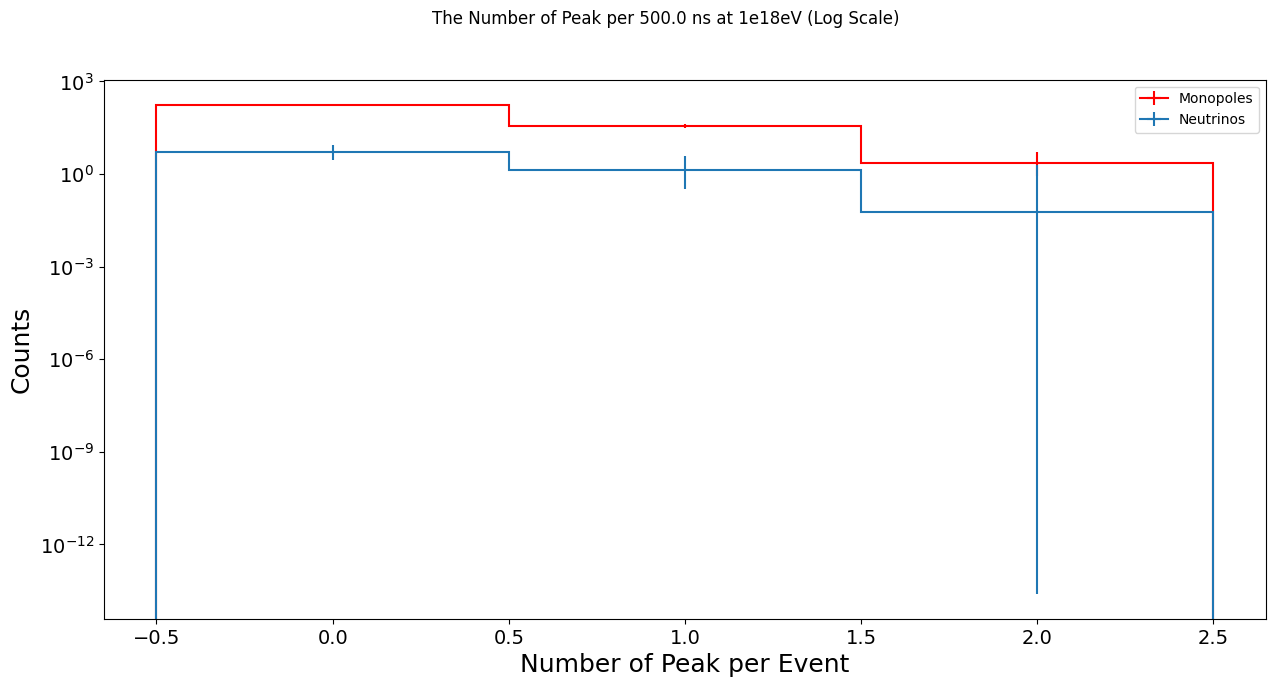

In [5]:
MM = np.array([4, 8, 14]) 
MM2 = np.array([67, 98, 196])
Neu = np.array([11, 27, 96]) 
plt.figure(figsize=(15, 7))
h_e1 = hep.histplot(h1[0]/11, h1[1], yerr=True, color = "red", label="Monopoles")
h_e2 = hep.histplot(h2[0]/67, h2[1], yerr=True, label="Neutrinos")
plt.xlabel("Number of Peak per Event")
plt.suptitle(f'The Number of Peak per {sample_size*0.625} ns at 1e{E}eV (Log Scale)')

plt.ylabel("Counts")
plt.yscale('log')
plt.legend()
plt.show()
########################




In [8]:
MM = [4, 8, 14]
Neu = [11, 27, 96]
# Read the CSV file
data_frame1 = pd.read_csv(data1)
data_frame2 = pd.read_csv(data2)
event_id1 = np.array(data_frame1["event"])
event_id2 = np.array(data_frame2["event"])

In [15]:
event_id1[-1]

67.0

In [9]:
####################
e_id1 = list(range(1, int(event_id1[-1]+1)))
e_id2 = list(range(1, int(event_id2[-1]+1)))
####################
s_ID1 = S_ID
s_ID2 = S_ID
####################
c_ID1 = C_ID
c_ID2 = C_ID

# Access a specific column by column name using indexing operator
trace1 = np.array(data_frame1.query(f"station == {s_ID1} and channel == {c_ID1} and event == {e_id1}")['Traces']) 
times1 = np.array(data_frame1.query(f"station == {s_ID1} and channel == {c_ID1} and event == {e_id1}")['Times'])

total_event1 = event_id1[-1]
print(len(trace1), total_event1)

trace2 = np.array(data_frame2.query(f"station == {s_ID2} and channel == {c_ID2} and event == {e_id2}")['Traces'])
times2 = np.array(data_frame2.query(f"station == {s_ID2} and channel == {c_ID2} and event == {e_id2}")['Times'])

total_event2 = event_id2[-1]
print(len(trace2), total_event2)

"""amp_time1, max_amp1, distance1, shower_id1 = get_station_data(path1, s_ID1, c_ID2)
amp_time2, max_amp2, distance2, shower_id2 = get_station_data(path2, s_ID2, c_ID2)"""

1820928 67.0
348512 11.0


'amp_time1, max_amp1, distance1, shower_id1 = get_station_data(path1, s_ID1, c_ID2)\namp_time2, max_amp2, distance2, shower_id2 = get_station_data(path2, s_ID2, c_ID2)'

In [28]:
#noise, v_bin1, t_bin1 = get_noise(trace1, times1, bin_size)

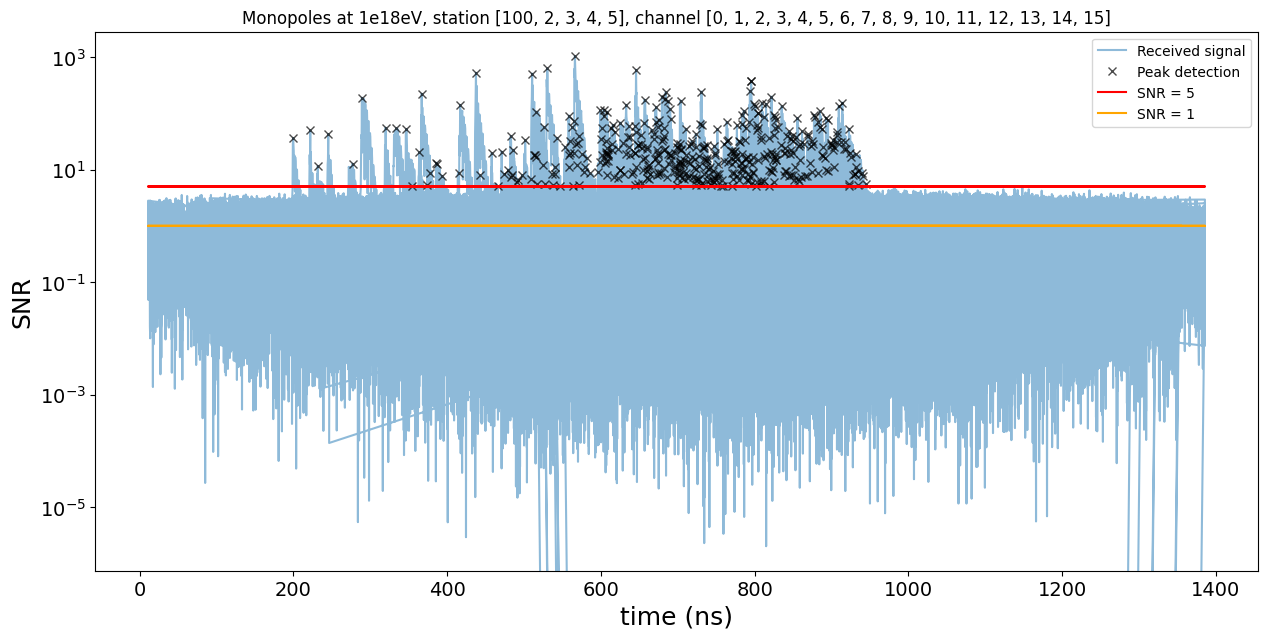

In [10]:
#Monopoles signal plot:
dt = 0.625#ns
plt.figure(figsize=(15, 7))
noise1=np.mean(NOISE1)
#plt.plot(t_bin1*dt, v_bin1/noise1, "-", label = "Received signal")
plt.plot(times1*dt, abs(trace1)/noise1,"-" ,alpha = 0.5, label = "Received signal")
#plt.plot(amp_time1*dt, max_amp1/noise1, "o",alpha = 0.5, label = "Max signal amplitude of the shower")
plt.plot(T_peak1*dt, V_peak1/noise1, "x", color = "black",alpha=0.7, label = "Peak detection")

plt.plot(times1*dt, threshold+times1*0, "-", label = f"SNR = {threshold}", color = "red")
plt.plot(times1*dt, 1+times1*0, "-", label = "SNR = 1", color = "orange")
#plt.xlim(min(t_bin1*dt), max(t_bin1*dt))
#plt.ylim(5e-1, max( V_peak1/noise1)*1.5)
plt.title(f"Monopoles at 1e{E}eV, station {s_ID1}, channel {c_ID1}")
plt.legend()
plt.ylabel("SNR")
plt.xlabel("time (ns)")
plt.yscale("log")
#plt.ylim(1e-9, 1e-1)
#plt.xlim(150, 350)
plt.show()

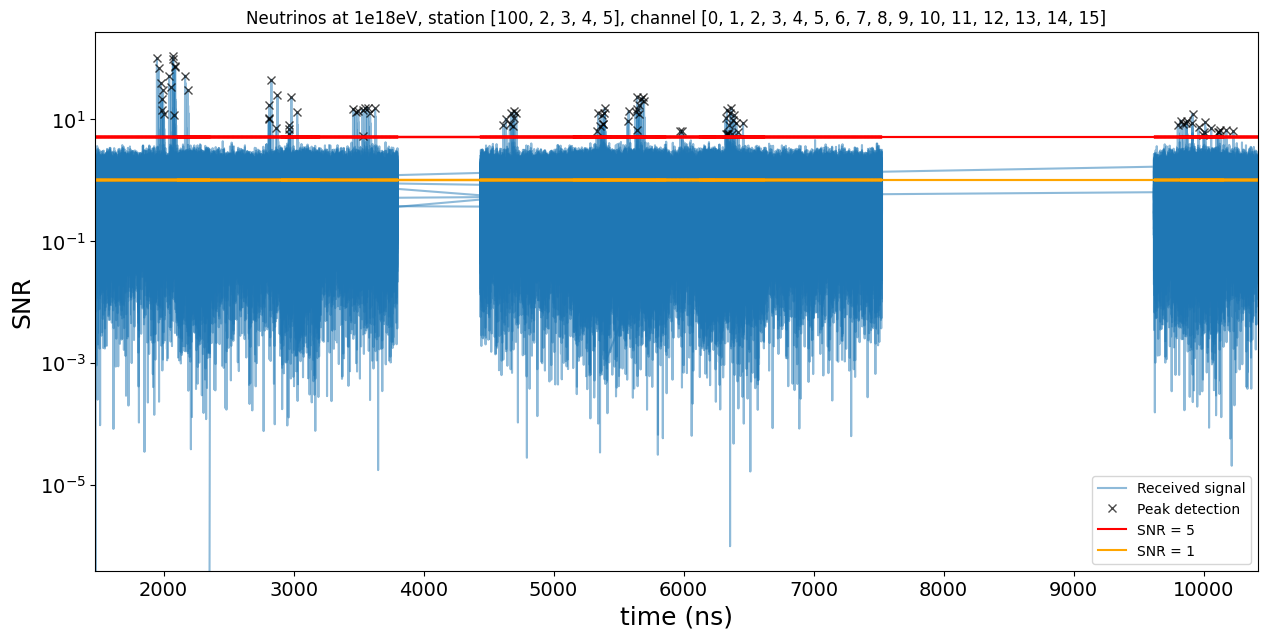

In [11]:
#Neutrinos signal plot:
dt = 0.625#ns
plt.figure(figsize=(15, 7))
plt.rcParams['agg.path.chunksize'] = 1000  # Set an appropriate value
noise2=np.mean(NOISE2)
plt.plot(times2*dt, abs(trace2)/noise2,"-" , alpha = 0.5, label = "Received signal")
#plt.plot(amp_time2*dt, max_amp2/noise2, ".",alpha = 1, label = "Max signal amplitude of the shower")
plt.plot(T_peak2*dt, V_peak2/NOISE2, "x", color = "black",alpha=0.7, label = "Peak detection")

plt.plot(times2*dt, threshold+times2*0, "-", label = f"SNR = {threshold}", color = "red")
plt.plot(times2*dt, 1+times2*0, "-", label = "SNR = 1", color = "orange")
plt.xlim(min(times2*dt), max(times2*dt))
#plt.ylim(5e-1, max(trace2/noise2)*1.5)
plt.title(f"Neutrinos at 1e{E}eV, station {s_ID2}, channel {c_ID2}")
plt.legend()
plt.ylabel("SNR")
plt.xlabel("time (ns)")
plt.yscale("log")
#plt.ylim(1e-9, 1e-1)
#plt.xlim(2000, 2200)
plt.show()

Mean of noise1: 1.0661514487245145e-05
Mean of noise2: 1.0661514487245145e-05


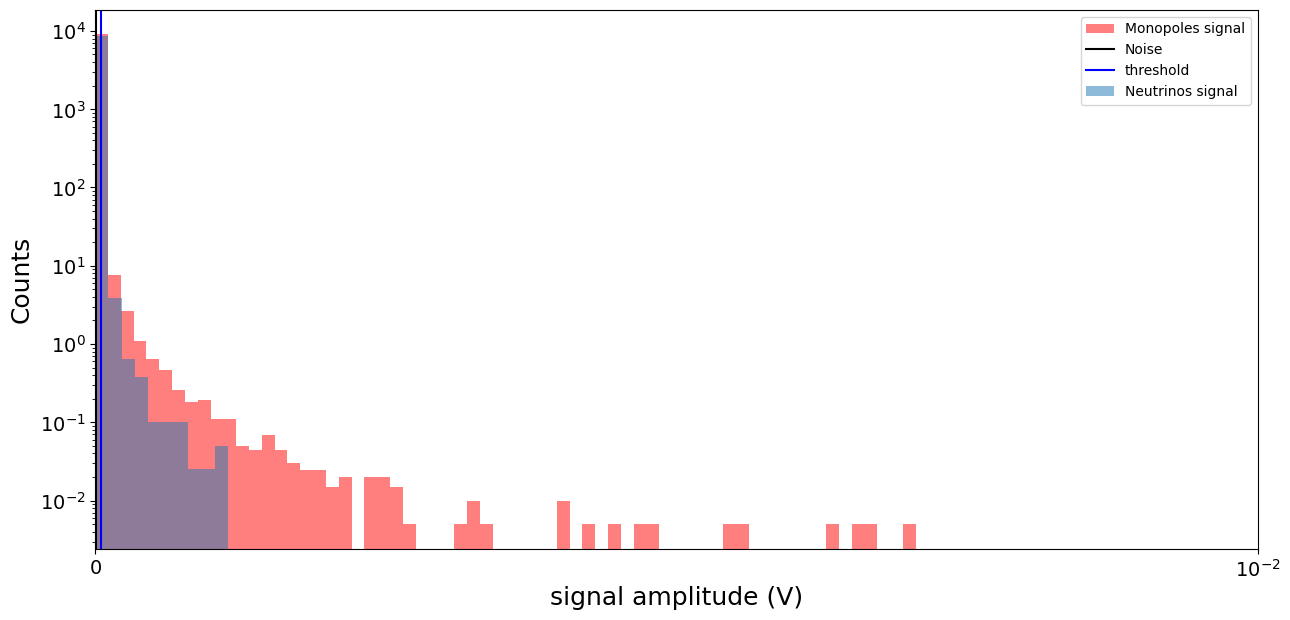

In [12]:
plt.figure(figsize=(15, 7))
#make side by side histogram plots with same axis range
#plt.subplot(1, 2, 1)
A = plt.hist(abs(trace1), bins=100, label='Monopoles signal', alpha=0.5, color='red', density=True)
plt.axvline(x= np.mean(NOISE1), color='black', linestyle='-', label='Noise')
plt.axvline(x= threshold*np.mean(NOISE1), color='blue', linestyle='-', label='threshold')
plt.xlabel('signal amplitude (V)')
#plt.yscale('log')
#plt.xscale('symlog')
plt.ylabel('Counts')
plt.legend()
print("Mean of noise1:", np.mean(NOISE1))
#plt.subplot(1, 2, 2)

B = plt.hist(abs(trace2), bins=10, label='Neutrinos signal', alpha=0.5,  density=True)
#plt.axvline(x= np.mean(NOISE2), color='black', linestyle='-', label='Noise')
#plt.axvline(x= threshold*np.mean(NOISE2), color='blue', linestyle='-', label='threshold')
#plt.xlabel('signal amplitude (V)')

plt.yscale('log')
plt.xscale('symlog')
plt.xlim(0, 1e-2)
#plt.ylabel('Counts')
plt.legend()
print("Mean of noise2:", np.mean(NOISE2))
plt.show()

Mean of noise2: 1.0661514487245145e-05


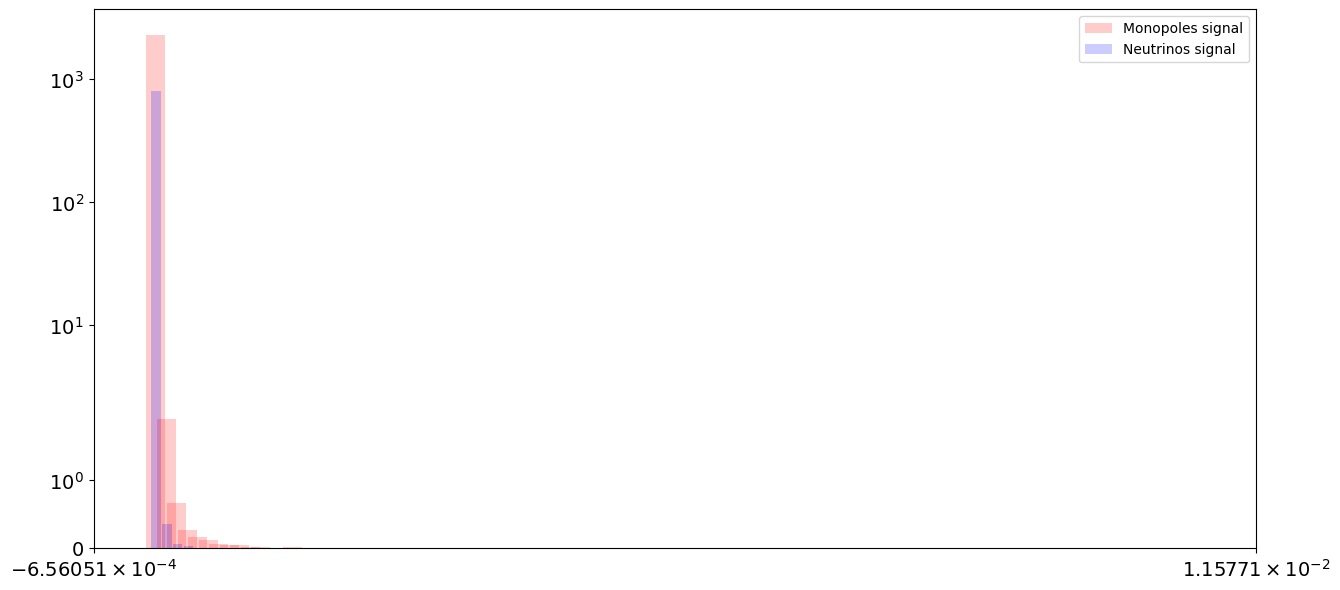

In [15]:
plt.figure(figsize=(15, 7))
plt.bar(A[1][:-1], A[0]/4, 0.0002, label='Monopoles signal', alpha=0.2, color='red') 
plt.bar(B[1][:-1], B[0]/11, 0.0001, label='Neutrinos signal', alpha=0.2, color='blue')
plt.yscale('symlog')
plt.xscale('symlog')
#plt.xlim(0, 2e-3)
#plt.ylabel('Counts')
plt.legend()
print("Mean of noise2:", np.mean(NOISE2))
plt.show()

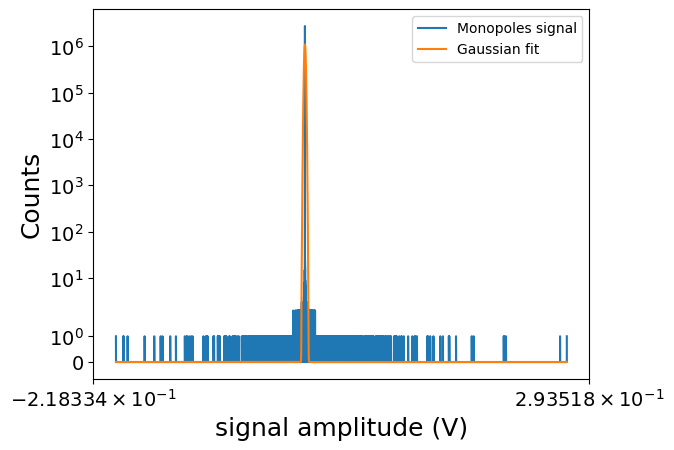

In [32]:
A = np.histogram(trace1, bins=len(trace1))
x = np.linspace(min(A[1][:-1]), max(A[1][:-1]), len(A[1][:-1]))
def gaussian(x, a, x0, sigma):
    return a*(1/np.sqrt(2*np.pi))*np.exp(-(x-x0)**2/(2*sigma**2))
plt.plot((A[1][:-1]), (A[0]), "-", label = "Monopoles signal")
plt.plot((x), (gaussian(x, max(A[0]), np.mean(trace1), np.std(trace1))), "-", label = "Gaussian fit")
#plt.plot(B[1][:-1], B[0], "-", label = "Neutrinos signal")
plt.yscale("symlog")
plt.xscale("symlog")
plt.xlabel("signal amplitude (V)")
plt.ylabel("Counts")
plt.legend()
plt.show()



In [16]:
A = np.histogram(trace1, bins=len(trace1))
sigma = np.std(trace1)
index = np.where(abs(A[1][:-1]) > (sigma))
A1 = A[0][index]
h = max(A1)
print(h)



46


In [17]:
t = np.array([1, 3, 6, 7, 8,21])
t2 = [j-i for i, j in zip(t[:-1], t[1:])]  # or use itertools.izip in py2k
t3 = np.diff(t)
t2, t3

([2, 3, 1, 1, 13], array([ 2,  3,  1,  1, 13]))

In [ ]:
t